Ian
TODO: exploratory hiv/aids, merge hiv/aids into Tiffany's merged df, clean covid, exploratory covid, merge covid into larger df
DONE:

Tiffany
TODO: probably something ¯\_(ツ)_/¯

Both
TODO: Cleaning/format the merged notebook for handin to make it professional

# Import packages

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data initializer

In [7]:
def init_data(csv):
    if "education" in csv:
        education = pd.read_csv(csv, skiprows=4)
        return education
        # education.head()
    if "GDP" in csv:
        gdp = pd.read_csv(csv, skiprows=4)
        return gdp
    if "malnutrition" in csv:
        malnutrition = pd.read_csv(csv, skiprows=4)
        return malnutrition
    if "poverty" in csv:
        poverty = pd.read_csv(csv, skiprows=4)
        return poverty
    if "swine" in csv:
        swine_flu = pd.read_csv(csv)
        return swine_flu
    if "hiv_aids" in csv:
        hiv_aids = pd.read_csv(csv)
        return hiv_aids
    if "covid" in csv:
        covid = pd.read_csv(csv)
        return covid

education

In [8]:
education = init_data("data/world_bank_data/education.csv")
education["Country"] = education["Country Name"]
education = education.drop(["Country Name"], axis=1).reindex()
education.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Country
0,ABW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.570641,101.180557,NaN,NaN,NaN,NaN,NaN,NaN,Aruba
1,AFE,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa Eastern and Southern
2,AFG,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.495041,84.414948,85.625328,84.330589,NaN,Afghanistan
3,AFW,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa Western and Central
4,AGO,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Angola


# Swine flu

In [9]:
swine = init_data("swine_flu_data.csv")
swine.head()

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
0,2009-04-24,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
1,2009-04-24,United States of America,7,0,https://www.who.int/csr/don/2009_04_24/en/
2,2009-04-26,Mexico,18,0,https://www.who.int/csr/don/2009_04_24/en/
3,2009-04-26,United States of America,20,0,https://www.who.int/csr/don/2009_04_24/en/
4,2009-04-27,Canada,6,0,https://www.who.int/csr/don/2009_04_24/en/


In [10]:
#sort
swine = swine.sort_values(by="Country")
swine.head()

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths,Link
2110,2009-07-01,Algeria,2,0,https://www.who.int/csr/don/2009_07_01a/en/
2355,2009-07-06,Algeria,5,0,https://www.who.int/csr/don/2009_07_06/en/
1994,2009-06-29,Algeria,2,0,https://www.who.int/csr/don/2009_06_29/en/
1882,2009-06-26,Algeria,2,0,https://www.who.int/csr/don/2009_06_26/en/
1774,2009-06-24,Algeria,2,0,https://www.who.int/csr/don/2009_06_24/en/


In [11]:
#drop the link column
swine = swine.drop(["Link"], axis=1)
swine.head()

,Date,Country,Cumulative no. of cases,Cumulative no. of deaths
2110,2009-07-01,Algeria,2,0
2355,2009-07-06,Algeria,5,0
1994,2009-06-29,Algeria,2,0
1882,2009-06-26,Algeria,2,0
1774,2009-06-24,Algeria,2,0


In [12]:
swine["Percent of Deaths"] = swine["Cumulative no. of deaths"] / swine["Cumulative no. of cases"]
swine = swine.groupby(["Country"]).sum().reset_index()
swine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   148 non-null    object 
 1   Cumulative no. of cases   148 non-null    int64  
 2   Cumulative no. of deaths  148 non-null    int64  
 3   Percent of Deaths         148 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.8+ KB


In [13]:
#List of countries
cc = []
for i in swine["Country"]:
    if i not in cc:
        cc.append(i)
    else:
        continue
# cc


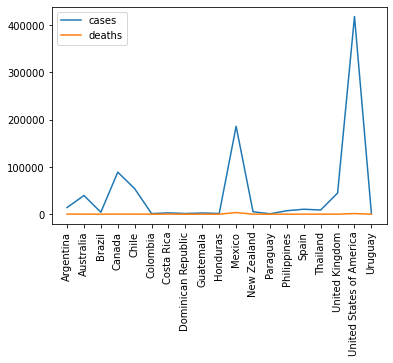

In [14]:
#plot countries
cases = []
deaths = []
country = []

for i in range(0, len(swine["Country"])):
    if swine["Cumulative no. of deaths"][i] > 0:
        # print('nope')
        country.append(swine["Country"][i])
        cases.append(swine["Cumulative no. of cases"][i])
        deaths.append(swine["Cumulative no. of deaths"][i])

plt.xticks(rotation=90)
plt.plot(country, cases)
plt.plot(country, deaths)
plt.legend(["cases", "deaths"])
plt.show()

#plot countries
plt.plot(swine["Country"], swine["Percent of Deaths"])

In [15]:
swine_edu = swine.merge(education, on="Country", how='left')
swine_edu = swine_edu.fillna(0)


In [16]:
swine_edu.head(1)

,Country,Cumulative no. of cases,Cumulative no. of deaths,Percent of Deaths,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Algeria,19,0,0.0,DZA,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,0.0,0.0,0.0,...,97.636299,101.552879,106.031677,108.391579,105.546722,105.59005,105.636711,105.143959,101.364632,103.663528


KeyError: 'Education in 2009'

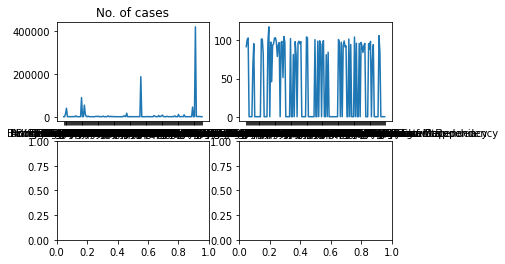

In [17]:
#plot Country, Number of cases, number of deaths
figure, axis = plt.subplots(2, 2)

#cases by country
axis[0, 0].plot(swine_edu["Country"], swine_edu["Cumulative no. of cases"])
axis[0, 0].set_title("No. of cases")

#2009 education
axis[0, 1].plot(swine_edu["Country"], swine_edu["2009"])
axis[0, 1].set_title(swine_edu["Education in 2009"])

#deaths by country
axis[1, 0].plot(swine_edu["Country"], swine_edu["Cumulative no. of deaths"])
axis[1, 0].set_title("No. of deaths")

#2010 education
axis[1, 1].plot(swine_edu["Country"], swine_edu["2010"])
axis[1, 1].set_title(swine_edu["Education in 2010"])

plt.show()

# HIV/AIDS

Read in the HIV/AIDS data containing death numbers per country

In [ ]:
hiv_aids_df = init_data('data/hiv_aids_data/hiv_aids_death_data.csv')

Lets check out the first few rows to get a feel for how the data looks

In [ ]:
hiv_aids_df.head()

Looking more closely at the data locally as a csv a lot of these columns have no values. Lets drop all the columns with no values

In [ ]:
hiv_aids_df.dropna(axis=1, how='all', inplace=True)
hiv_aids_df

The IndicatorCode, ValueType, ParentsLocationCode,ParentLocation,LocationType,Period type,IsLastYear,Language will all be useless dropping them

In [ ]:
hiv_aids_df.drop(
    columns=['IndicatorCode', 'ValueType', 'ParentLocationCode', 'ParentLocation', 'Location type', 'Period type',
             'IsLatestYear', 'Language', 'DateModified', 'FactValueTranslationID', 'FactValueNumericPrefix',
             'FactValueNumericLowPrefix', 'FactValueNumericLow', 'FactValueNumericLowPrefix', 'FactValueNumericHighPrefix',
             'FactValueNumericHigh', 'Value'], axis=1, inplace=True)

There is still missing data for the value which is the most important column for analysis, dropping all the rows where the value is missing.

In [ ]:
hiv_aids_df.dropna(subset='FactValueNumeric', axis=0, inplace=True)
hiv_aids_df

In [ ]:
plt.plot(hiv_aids_df['Period'],hiv_aids_df['FactValueNumeric'])

After getting rid of all of those values there are only 131 countries

In [ ]:
plt.plot(hiv_aids_df['Location'],hiv_aids_df['FactValueNumeric'])

In [ ]:
unique_aiv_aids_countries = hiv_aids_df.Location.unique()
len(hiv_aids_df.unique_aiv_aids_countries)

Covid

In [ ]:
covid_df = init_data('data/covid/full_grouped.csv')
unique_countries = np.unique(covid_df['Country/Region'])